# 1. Install dependencies (Colab / local)

In [ ]:
# pip install tensorflow opencv-python matplotlib pillow
# If TensorFlow doesn't install, use:
# pip install tensorflow==2.14.0

#  3. Split Dataset into train/val/test

In [2]:
import os, shutil, random
from pathlib import Path

SOURCE_DIR = "/home/adoh/PycharmProjects/AI_Future_Directions/dataset-resized"
TARGET_DIR = "/home/adoh/PycharmProjects/AI_Future_Directions/dataset"

classes = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]
splits = ["train", "val", "test"]
ratios = [0.7, 0.2, 0.1]

# Create folders
for split in splits:
    for cls in classes:
        Path(TARGET_DIR, split, cls).mkdir(parents=True, exist_ok=True)

# Split and copy
for cls in classes:
    src = Path(SOURCE_DIR) / cls
    files = list(src.glob("*"))
    random.shuffle(files)

    train_end = int(len(files) * ratios[0])
    val_end = train_end + int(len(files) * ratios[1])

    data_split = {
        "train": files[:train_end],
        "val": files[train_end:val_end],
        "test": files[val_end:]
    }

    for split_name, split_files in data_split.items():
        for f in split_files:
            shutil.copy(f, Path(TARGET_DIR) / split_name / cls)

print("Dataset successfully split!")


Dataset successfully split!


# 4. Train a MobileNetV2 Model

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os

DATASET_DIR = "dataset"
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATASET_DIR, "train"),
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(DATASET_DIR, "val"),
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Classes:", class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(AUTOTUNE)
val_ds = val_ds.prefetch(AUTOTUNE)

# MobileNetV2 feature extractor
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMAGE_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(len(class_names), activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS)

model.save("waste_classifier.h5")
print("Model saved!")


Found 1766 files belonging to 6 classes.


2025-11-15 09:22:54.129979: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Found 503 files belonging to 6 classes.
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 17s 2us/step
Epoch 1/10


2025-11-15 09:23:20.663328: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 154140672 exceeds 10% of free system memory.
2025-11-15 09:23:20.787167: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 156905472 exceeds 10% of free system memory.


 1/56 ━━━━━━━━━━━━━━━━━━━━ 6:49 7s/step - accuracy: 0.1562 - loss: 1.9819

2025-11-15 09:23:22.033398: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 154140672 exceeds 10% of free system memory.
2025-11-15 09:23:22.161485: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 156905472 exceeds 10% of free system memory.


 2/56 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.1797 - loss: 1.9629 

2025-11-15 09:23:23.011105: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 154140672 exceeds 10% of free system memory.


56/56 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.4977 - loss: 1.3259 - val_accuracy: 0.5785 - val_loss: 1.1062
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.6206 - loss: 1.0119 - val_accuracy: 0.6223 - val_loss: 1.0144
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6755 - loss: 0.8794 - val_accuracy: 0.6322 - val_loss: 0.9877
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7078 - loss: 0.7760 - val_accuracy: 0.6441 - val_loss: 0.9459
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7503 - loss: 0.7125 - val_accuracy: 0.6581 - val_loss: 0.9034
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.7605 - loss: 0.6512 - val_accuracy: 0.7038 - val_loss: 0.8557
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7724 - loss: 0.6186 - val_accuracy: 0.7058 - val_loss: 0.8450
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.8063 - loss: 0.5473 - val_accuracy: 0.7078 - val_loss: 0.8444
Epo

Model saved!


# 5. Plot Training Accuracy

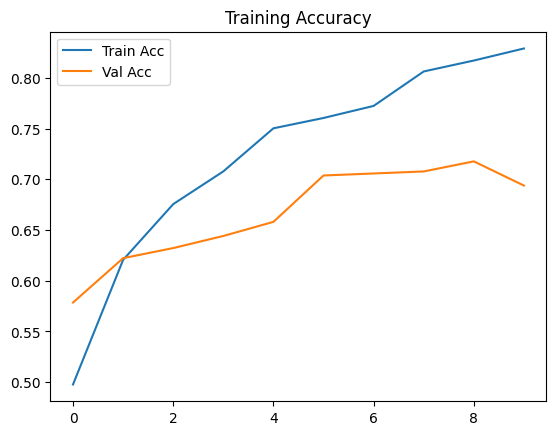

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Training Accuracy")
plt.show()


# 6. Convert to TensorFlow Lite

In [5]:
model = tf.keras.models.load_model("waste_classifier.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open("waste_classifier.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved as waste_classifier.tflite")


INFO:tensorflow:Assets written to: /tmp/tmp1twjhs9o/assets


INFO:tensorflow:Assets written to: /tmp/tmp1twjhs9o/assets


Saved artifact at '/tmp/tmp1twjhs9o'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  128563950167120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128563950168272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128563950168080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128563950167696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128563950168848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128563950167312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128563950168464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128563950168656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128563950166928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  128563950169808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1285639501692

W0000 00:00:1763188487.584064   13416 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1763188487.584092   13416 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-11-15 09:34:47.584497: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp1twjhs9o
2025-11-15 09:34:47.600819: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-11-15 09:34:47.600847: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp1twjhs9o
I0000 00:00:1763188487.776615   13416 mlir_graph_optimization_pass.cc:437] MLIR V1 optimization pass is not enabled
2025-11-15 09:34:47.813338: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-11-15 09:34:48.758023: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp1twjhs9o
2025-11-15 09:34:48.995730: I tensorflow/cc/saved_model/loader.cc:471] SavedModel 

TFLite model saved as waste_classifier.tflite


# 7. Run Inference using TFLite

In [8]:
import tensorflow as tf
import numpy as np
from PIL import Image

# Load TFLite model
interpreter = tf.lite.Interpreter(model_path="waste_classifier.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# ← Replace this with your actual image path
IMAGE_PATH = "/home/adoh/PycharmProjects/AI_Future_Directions/dataset-resized/metal/metal19.jpg"

# Image settings
IMAGE_SIZE = (224, 224)

# Load and preprocess image
img = Image.open(IMAGE_PATH).resize(IMAGE_SIZE)
img_array = np.expand_dims(np.array(img) / 255.0, axis=0).astype("float32")

# Run inference
interpreter.set_tensor(input_details[0]['index'], img_array)
interpreter.invoke()

pred = interpreter.get_tensor(output_details[0]['index'])[0]

class_names = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

predicted_class = class_names[np.argmax(pred)]
confidence = float(np.max(pred))

print("Prediction:", predicted_class)
print("Confidence:", round(confidence, 4))


Prediction: metal
Confidence: 0.965
